<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<img src = "https://github.com/Jangrae/img/blob/master/titanic2.png?raw=true" width=800 align="left"/>

# 실습 내용

- 머신러닝 모델링을 위한 코딩은 무조건 할 수 있어야 합니다.
- 코딩 내용을 자세히 알지 못해도 무작정 코딩을 진행해봅니다.
- Titanic 데이터를 대상으로 모델링을 진행합니다.
- kNN 알고리즘을 사용합니다.
- 다양한 방법으로 모델 성능을 평가합니다.

# 1.환경 준비

- 기본 **라이브러리**와 대상 **데이터**를 가져와 이후 과정을 준비합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_11.png?raw=true" width=700 align="left"/>

In [3]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'

In [4]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/titanic.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 **충분히 이해**할 수 있도록 다양한 **탐색** 과정을 수행합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_12.png?raw=true" width=700 align="left"/>

In [5]:
# 상/하위 몇 개 행 확인
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# 하위 몇 개 행 확인
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
# 변수 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# 기초통계량 확인
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# 상관관계 확인
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


# 3.데이터 준비

- **전처리** 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_13.png?raw=true" width=700 align="left"/>

**1) 변수 제거**

- 분석에 의미가 없다고 판단되는 변수는 제거합니다.

In [10]:
# 불필요한 열 제거
drop_cols = ['PassengerId', 'Name', 'Ticket', 'Cabin']
data.drop(drop_cols , axis =1 , inplace = True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


**2) 결측치 처리**

- 결측치가 있으면 제거하거나 적절한 값으로 채웁니다.

In [11]:
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [12]:
# Age 결측치를 Age 중앙값으로 채우기
age_median = data['Age'].median()
data['Age'].fillna(age_median, inplace = True)
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [13]:
# Embarked 최빈값 'S'로 채우기
data['Embarked'].fillna('S',inplace = True)
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

**3) x, y 분리**

- target 변수를 명확히 지정합니다.
- target을 제외한 변수를 x 데이터프레임으로 선언합니다.
- y 데이터프레임은 target 변수만을 가집니다.

In [14]:
# target 확인
target = 'Survived'

# 데이터 분리
x = data.drop(target, axis =1 )
y = data[target]


**4) 가변수화**

- x 데이터 프레임의 범주형 변수를 가변수화 합니다.

In [15]:
# 가변수화 대상: Pclass, Sex, Embarked
dumm_cols = ['Pclass', 'Sex', 'Embarked']

# 가변수화
x = pd.get_dummies(data = x, columns = dumm_cols,drop_first=True)

#  확인
x.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,0,1,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,1,0,0,1
3,35.0,1,0,53.1000,0,0,0,0,1
4,35.0,0,0,8.0500,0,1,1,0,1


**5) 학습용, 평가용 데이터 분리**

- 학습용, 평가용 데이터를 적절한 비율로 분리합니다.
- 반복 실행 시 동일한 결과를 얻기 위해 random_state 옵션을 지정합니다.

In [16]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train ,x_test , y_train, y_test = train_test_split(x,y, random_state = 2022,test_size=0.3 )

# 4.모델링

- 본격적으로 모델을 **선언**하고 **학습**하고 **평가**하는 과정을 진행합니다.
- 우선 **회귀** 문제인지 **분류** 문제인지 명확히 구분합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_14.png?raw=true" width=700 align="left"/>

- 회귀 문제 인가요? 분류 문제인가요?
- 회귀인지 분류인지에 따라 사용할 알고리즘과 평가 방법이 달라집니다.
- 우선 다음 알고리즘을 사용합니다.
    - 알고리즘: KNeighborsClassifier

In [17]:
# 1단계: 불러오기
from sklearn.neighbors import KNeighborsClassifier

In [18]:
# 2단계: 선언하기
model = KNeighborsClassifier()

In [19]:
# 3단계: 학습하기
model.fit(x_train, y_train)

KNeighborsClassifier()

In [20]:
# 4단계: 예측하기
y_pred = model.predict(x_test)
print(y_pred[:10])

[0 1 0 0 0 0 0 1 0 0]


# 5.분류 성능 평가

- 다양한 성능 지표로 분류 모델 성능을 평가합니다.

**1) Confusion Matrix**

In [21]:
# 모듈 불러오기
from sklearn.metrics import confusion_matrix

# 성능 평가
confusion_matrix(y_test, y_pred)

array([[134,  34],
       [ 43,  57]], dtype=int64)

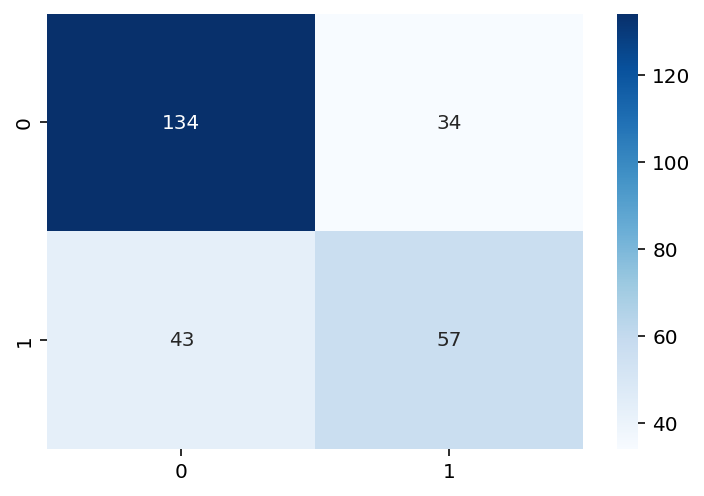

In [22]:
# 혼동행렬 시각화

sns.heatmap(confusion_matrix(y_test,y_pred) , annot =True,cmap='Blues',fmt = 'd')
plt.show()


**2) Accuracy**

In [23]:
# 모듈 불러오기
from sklearn.metrics import accuracy_score

# 성능 평가
accuracy_score(y_test, y_pred)

0.7126865671641791

**3) Precision**

In [24]:
# 모듈 불러오기
from sklearn.metrics import precision_score

# 성능 평가
print(np.unique(y_test))
print(precision_score(y_test, y_pred, average=None))

[0 1]
[0.75706215 0.62637363]


**4) Recall**

In [25]:
# 모듈 불러오기
from sklearn.metrics import recall_score

# 성능 평가
print(np.unique(y_test))
print(recall_score(y_test, y_pred, average=None))

[0 1]
[0.79761905 0.57      ]


**5) F1-Score**

In [26]:
# 모듈 불러오기
from sklearn.metrics import f1_score

# 성능 평가
print(np.unique(y_test))
print(f1_score(y_test, y_pred,average=None))

[0 1]
[0.77681159 0.59685864]


**6) Classification Report**

In [27]:
# 모듈 불러오기
from sklearn.metrics import classification_report

# 성능 평가
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       168
           1       0.63      0.57      0.60       100

    accuracy                           0.71       268
   macro avg       0.69      0.68      0.69       268
weighted avg       0.71      0.71      0.71       268



## 번외 Title 변수 추가

- data 를 다시끌어와 Title 을 추가해보자

In [28]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/titanic.csv'
data = pd.read_csv(path)

In [29]:
# Title 열 추가  --> 정규식 사용
data['Title'] = data['Name'].str.extract('([A-Za-z]+)\.') # .  \ 앞에 ()안에 있는 [A~z]까지 가져온다 대신 
                                                                #     문자열이 2개이상인경우 +를 추가
# 확인 
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [30]:
# 불필요한 열 제거
drop_cols = ['PassengerId', 'Name', 'Ticket', 'Cabin']
data.drop(drop_cols , axis =1 , inplace = True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


In [31]:
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         0
dtype: int64

In [32]:
# Age 결측치를 Title별 Age 중앙값으로 채우기
age_median = data['Age'].median()
data['Age'].fillna(data.groupby('Title')['Age'].transform('median'), inplace = True)


# Embarked 최빈값 'S'로 채우기
data['Embarked'].fillna('S',inplace = True)
print(data.isna().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64


In [33]:
# 가변수화 대상: Pclass, Sex, Embarked
dumm_cols = ['Pclass', 'Sex', 'Embarked','Title']

# 가변수화
data = pd.get_dummies(data = data, columns = dumm_cols)

#  확인
data.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir
0,0,22.0,1,0,7.2500,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
1,1,38.0,1,0,71.2833,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
3,1,35.0,1,0,53.1000,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,35.0,0,0,8.0500,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0


In [34]:
# target 확인
target = 'Survived'

# 데이터 분리
x = data.drop(target, axis =1 )
y = data[target]


In [35]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train ,x_test , y_train, y_test = train_test_split(x,y, random_state = 2022,test_size=0.3 )

In [36]:
# 1단계: 불러오기
from sklearn.neighbors import KNeighborsClassifier

# 2단계: 선언하기
model = KNeighborsClassifier()

# 3단계: 학습하기
model.fit(x_train, y_train)

# 4단계: 예측하기
y_pred = model.predict(x_test)
print(y_pred[:10])

[0 1 0 1 0 0 0 0 0 0]


In [37]:
# 모듈 불러오기
from sklearn.metrics import confusion_matrix

# 성능 평가
confusion_matrix(y_test, y_pred)

array([[132,  36],
       [ 45,  55]], dtype=int64)

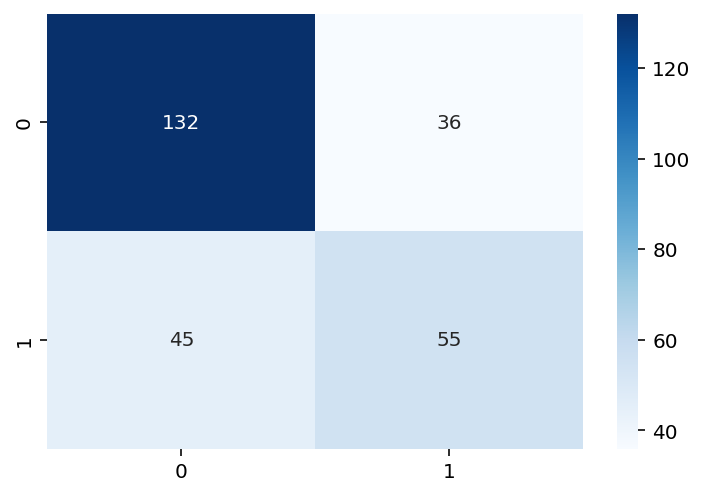

In [38]:
# 혼동행렬 시각화

sns.heatmap(confusion_matrix(y_test,y_pred) , annot =True,cmap='Blues',fmt = 'd')
plt.show()


In [190]:
# 모듈 불러오기
from sklearn.metrics import accuracy_score

# 성능 평가
print('Accuracy',accuracy_score(y_test, y_pred))

# 모듈 불러오기
from sklearn.metrics import precision_score

# 성능 평가
# print(np.unique(y_test))
print('Precision' ,precision_score(y_test, y_pred, average=None))

# 모듈 불러오기
from sklearn.metrics import recall_score

# 성능 평가
# print(np.unique(y_test))
print('Recall', recall_score(y_test, y_pred, average=None))

# 모듈 불러오기
from sklearn.metrics import f1_score

# 성능 평가
# print(np.unique(y_test))
print('f1_score',f1_score(y_test, y_pred,average=None))

# 모듈 불러오기
from sklearn.metrics import classification_report

# 성능 평가
print(classification_report(y_test,y_pred,digits=3))

Accuracy 0.6977611940298507
Precision [0.74576271 0.6043956 ]
Recall [0.78571429 0.55      ]
f1_score [0.76521739 0.57591623]
              precision    recall  f1-score   support

           0      0.746     0.786     0.765       168
           1      0.604     0.550     0.576       100

    accuracy                          0.698       268
   macro avg      0.675     0.668     0.671       268
weighted avg      0.693     0.698     0.695       268

